In [6]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [7]:
df=pd.read_csv("kc_house_data.csv")

In [8]:
df.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0, 0.5, 'bathrooms')

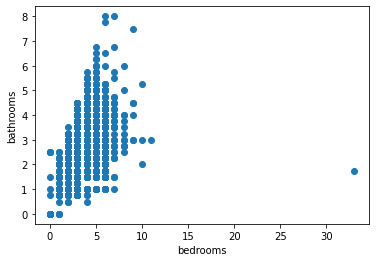

In [10]:
plt.scatter(df['bedrooms'],df['bathrooms'])
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')

Text(0, 0.5, 'long')

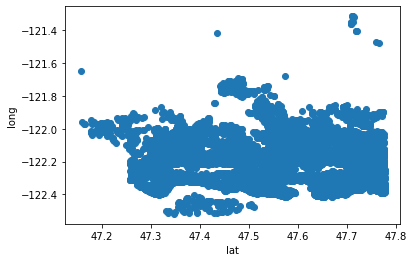

In [11]:
plt.scatter(df['lat'],df['long'])
plt.xlabel('lat')
plt.ylabel('long')

Text(0, 0.5, 'sqft_lot')

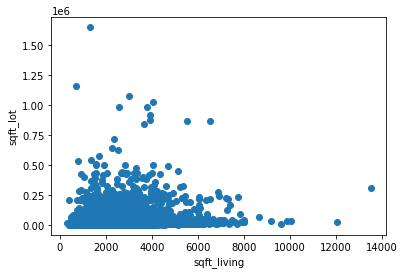

In [12]:
plt.scatter(df['sqft_living'],df['sqft_lot'])
plt.xlabel('sqft_living')
plt.ylabel('sqft_lot')

In [13]:
km=KMeans(5)

In [14]:
y_predicted=km.fit_predict(df[['bedrooms','bathrooms']])
y_predicted

array([2, 4, 0, ..., 0, 4, 0])

In [15]:
df['Cluster']=y_predicted
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,4


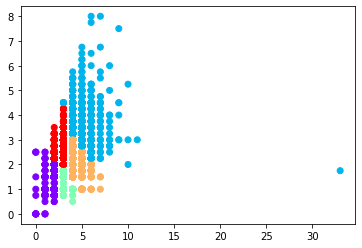

In [16]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

scaler.fit(df[['bathrooms']])
df['bathrooms']=scaler.transform(df[['bathrooms']])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,3,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,20141209T000000,538000.0,3,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,5631500400,20150225T000000,180000.0,2,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,20150218T000000,510000.0,3,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,0.31250,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,4
21609,6600060120,20150223T000000,400000.0,4,0.31250,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,3
21610,1523300141,20140623T000000,402101.0,2,0.09375,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,20150116T000000,400000.0,3,0.31250,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,4


In [19]:
scaler.fit(df[['bedrooms']])
df['bedrooms']=scaler.transform(df[['bedrooms']])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,0.090909,0.31250,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,4
21609,6600060120,20150223T000000,400000.0,0.121212,0.31250,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,3
21610,1523300141,20140623T000000,402101.0,0.060606,0.09375,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,20150116T000000,400000.0,0.090909,0.31250,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,4


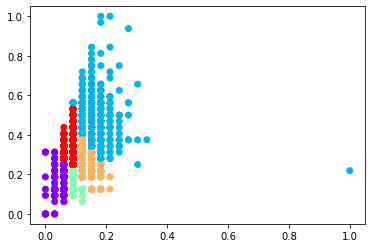

In [20]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')

In [21]:
km=KMeans(5)
y_predicted=km.fit_predict(df[['bedrooms','bathrooms']])
y_predicted

array([1, 0, 1, ..., 1, 0, 1])

In [22]:
df['Cluster']=y_predicted
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3


In [23]:
km.cluster_centers_

array([[0.10859964, 0.3093427 ],
       [0.07920389, 0.12413722],
       [0.12363093, 0.41017377],
       [0.09737462, 0.22110555],
       [0.1461764 , 0.5583902 ]])

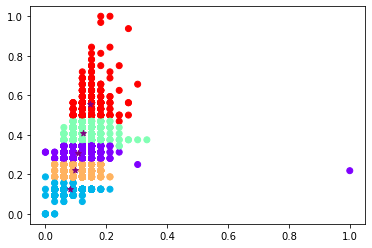

In [24]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centrold')

In [25]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['bedrooms','bathrooms']])
    sse.append(km.inertia_)

In [26]:
sse

[217.46663016831667,
 86.66868438128223,
 50.391838069248784,
 30.994175004535084,
 23.754317714164845,
 20.22630694730088,
 17.92719275820799,
 16.586620723293564,
 14.480251081934862]

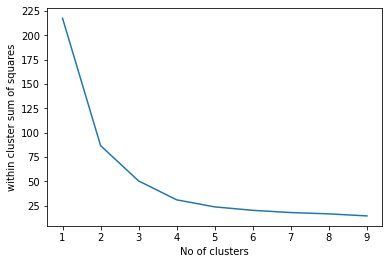

In [27]:
plt.xlabel('No of clusters')
plt.ylabel('within cluster sum of squares')
plt.plot(k_range,sse)

In [28]:
km=KMeans(5)
y_predicted=km.fit_predict(df[['bedrooms','bathrooms']])
y_predicted

array([0, 1, 0, ..., 0, 1, 0])

In [29]:
df['Cluster']=y_predicted
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2


In [30]:
km.cluster_centers_

array([[0.07920389, 0.12413722],
       [0.10859964, 0.3093427 ],
       [0.09737462, 0.22110555],
       [0.12363093, 0.41017377],
       [0.1461764 , 0.5583902 ]])

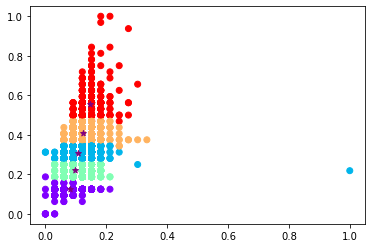

In [31]:
plt.scatter(df['bedrooms'],df['bathrooms'],c=df['Cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centrold')

In [32]:
##################################################################################################################################

In [33]:
km=KMeans(5)

In [34]:
y_predicted=km.fit_predict(df[['lat','long']])
y_predicted

array([0, 2, 2, ..., 2, 4, 2])

In [35]:
df['Cluster']=y_predicted
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,4


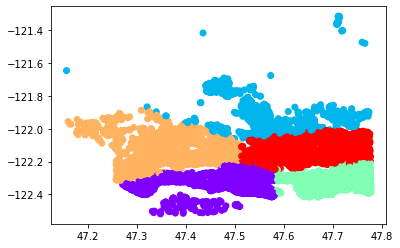

In [36]:
plt.scatter(df['lat'],df['long'],c=df['Cluster'],cmap='rainbow')

In [37]:
scaler=MinMaxScaler()

scaler.fit(df[['lat']])
df['lat']=scaler.transform(df[['lat']])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,0.571498,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,0.908959,-122.319,1690,7639,2
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,0.936143,-122.233,2720,8062,2
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,0.586939,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,0.741354,-122.045,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,0.090909,0.31250,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,0.874055,-122.346,1530,1509,2
21609,6600060120,20150223T000000,400000.0,0.121212,0.31250,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,0.570693,-122.362,1830,7200,0
21610,1523300141,20140623T000000,402101.0,0.060606,0.09375,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,0.705324,-122.299,1020,2007,2
21611,291310100,20150116T000000,400000.0,0.090909,0.31250,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,0.608975,-122.069,1410,1287,4


In [38]:
scaler=MinMaxScaler()

scaler.fit(df[['long']])
df['long']=scaler.transform(df[['long']])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,0.571498,0.217608,1340,5650,0
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,0.908959,0.166113,1690,7639,2
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,0.936143,0.237542,2720,8062,2
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,0.586939,0.104651,1360,5000,0
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,0.741354,0.393688,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,0.090909,0.31250,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,0.874055,0.143688,1530,1509,2
21609,6600060120,20150223T000000,400000.0,0.121212,0.31250,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,0.570693,0.130399,1830,7200,0
21610,1523300141,20140623T000000,402101.0,0.060606,0.09375,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,0.705324,0.182724,1020,2007,2
21611,291310100,20150116T000000,400000.0,0.090909,0.31250,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,0.608975,0.373754,1410,1287,4


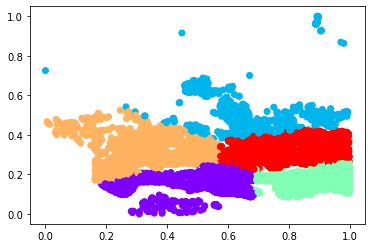

In [39]:
plt.scatter(df['lat'],df['long'],c=df['Cluster'],cmap='rainbow')

In [40]:
km=KMeans(5)
y_predicted=km.fit_predict(df[['lat','long']])
y_predicted

array([0, 3, 3, ..., 0, 4, 0])

In [41]:
df['Cluster']=y_predicted
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
0,7129300520,20141013T000000,221900.0,0.090909,0.12500,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,0.571498,0.217608,1340,5650,0
1,6414100192,20141209T000000,538000.0,0.090909,0.28125,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,0.908959,0.166113,1690,7639,3
2,5631500400,20150225T000000,180000.0,0.060606,0.12500,770,10000,1.0,0,0,...,770,0,1933,0,98028,0.936143,0.237542,2720,8062,3
3,2487200875,20141209T000000,604000.0,0.121212,0.37500,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,0.586939,0.104651,1360,5000,0
4,1954400510,20150218T000000,510000.0,0.090909,0.25000,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,0.741354,0.393688,1800,7503,1


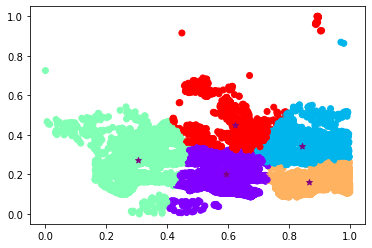

In [42]:
plt.scatter(df['lat'],df['long'],c=df['Cluster'],cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centrold')

In [43]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['bedrooms','bathrooms']])
    sse.append(km.inertia_)

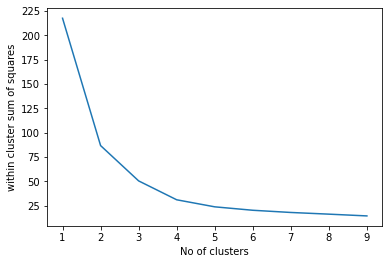

In [44]:
plt.xlabel('No of clusters')
plt.ylabel('within cluster sum of squares')
plt.plot(k_range,sse)